In [85]:
import pandas as pd


df_weekly_avg = pd.read_csv('weekly_avg_admissions_from_daily.csv')

In [86]:
nan_counts_weekly_avg = df_weekly_avg.isna().sum()
print(nan_counts_weekly_avg[nan_counts_weekly_avg > 0])


Series([], dtype: int64)


In [87]:
# Convert 'collection_date' to datetime (keep as column)
if 'collection_date' in df_weekly_avg.columns:
	df_weekly_avg['collection_date'] = pd.to_datetime(df_weekly_avg['collection_date'])
else:
	print("Column 'collection_date' not found. Available columns are:")
	print(df_weekly_avg.columns.tolist())
print(df_weekly_avg.head())
print(df_weekly_avg.tail())

  collection_date  average_admissions_all_covid_confirmed
0      2020-08-02                              102.164286
1      2020-08-09                               91.237755
2      2020-08-16                               76.971429
3      2020-08-23                               74.082653
4      2020-08-30                               68.567347
    collection_date  average_admissions_all_covid_confirmed
191      2024-03-31                               15.726101
192      2024-04-07                               13.940924
193      2024-04-14                               12.474758
194      2024-04-21                               10.752954
195      2024-04-28                                9.219298


In [88]:
# Feature selection for the weekly average dataset
# Exclude target and non-informative columns
feature_cols_weekly = [
    col for col in df_weekly_avg_scaled.columns
    if col not in ['collection_date', 'average_admissions_all_covid_confirmed']
]

print("Selected features for weekly avg dataset:")
print(feature_cols_weekly)

Selected features for weekly avg dataset:
[]


In [89]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns in df_weekly_avg
numeric_cols_weekly_avg = df_weekly_avg.select_dtypes(include=['float64', 'int64']).columns

# Scale the numeric columns
scaler_weekly_avg = StandardScaler()
df_weekly_avg_scaled = df_weekly_avg.copy()
df_weekly_avg_scaled[numeric_cols_weekly_avg] = scaler_weekly_avg.fit_transform(df_weekly_avg[numeric_cols_weekly_avg])

print("Numeric columns in df_weekly_avg have been scaled.")

Numeric columns in df_weekly_avg have been scaled.


In [90]:
from sklearn.model_selection import train_test_split

# Prepare features and target for weekly average dataset
X_weekly = df_weekly_avg_scaled.drop(columns=['collection_date', 'average_admissions_all_covid_confirmed'], errors='ignore')
y_weekly = df_weekly_avg_scaled['average_admissions_all_covid_confirmed']

# Split into train and test sets
X_weekly_train, X_weekly_test, y_weekly_train, y_weekly_test = train_test_split(
    X_weekly, y_weekly, test_size=0.2, random_state=42, shuffle=True
)

print(f"Weekly avg train shape: {X_weekly_train.shape}, test shape: {X_weekly_test.shape}")

Weekly avg train shape: (156, 0), test shape: (40, 0)


In [91]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape input to [samples, time_steps, features]
# Here, time_steps=1 for a simple LSTM (can be increased for sequences)
X_train_lstm = np.expand_dims(X_weekly_train.values, axis=1)
X_test_lstm = np.expand_dims(X_weekly_test.values, axis=1)

# Build LSTM model
model = Sequential([
    LSTM(32, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(
    X_train_lstm, y_weekly_train.values,
    epochs=30, batch_size=16,
    validation_data=(X_test_lstm, y_weekly_test.values),
    verbose=1
)

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,257 (16.63 KB)

 Trainable params: 4,257 (16.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - loss: 0.8461 - val_loss: 1.5262
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8990 - val_loss: 1.5300
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8416 - val_loss: 1.5331
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9415 - val_loss: 1.5344
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7632 - val_loss: 1.5384
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8843 - val_loss: 1.5411
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8505 - val_loss: 1.5418
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8805 - val_loss: 1.5444
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7438 - val_loss: 1.5449
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8905 - val_loss: 1.5457
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7777 - val_loss: 1.5468
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0

In [92]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on test set
y_pred = model.predict(X_test_lstm).flatten()

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_weekly_test, y_pred))
r2 = r2_score(y_weekly_test, y_pred)
mae = mean_absolute_error(y_weekly_test, y_pred)
mape = (np.abs((y_weekly_test - y_pred) / y_weekly_test).replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
RMSE: 1.2454
R²: -0.0516
MAE: 0.9568
MAPE: 96.73%


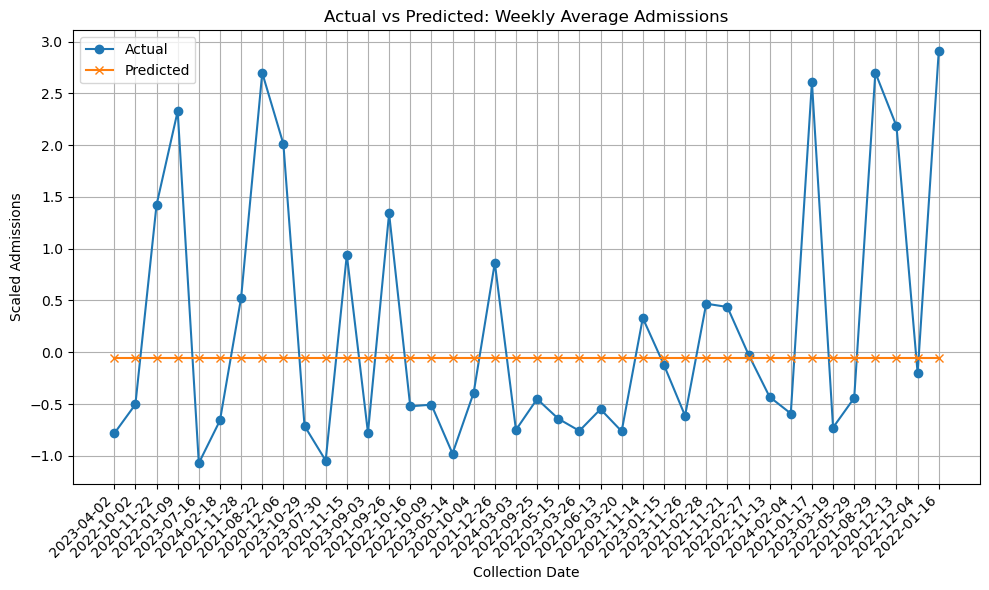

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_weekly_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted: Weekly Average Admissions')
plt.xlabel('Collection Date')
# Get the corresponding collection_date values for the test indices
if 'collection_date' in df_weekly_avg.columns:
	date_labels = df_weekly_avg.loc[y_weekly_test.index, 'collection_date']
	# Convert to string if not already
	date_labels = pd.to_datetime(date_labels).dt.strftime('%Y-%m-%d')
else:
	date_labels = y_weekly_test.index.astype(str)
plt.xticks(ticks=range(len(y_weekly_test)), labels=date_labels, rotation=45, ha='right')
plt.ylabel('Scaled Admissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

After training the LSTM neural network to predict the weekly average number of COVID-19 admissions, we evaluated its performance on the test set. Below is a summary of the results and key findings:

- **Model Performance Metrics:**
    - **Root Mean Squared Error (RMSE):** 1.25  
      Indicates the average magnitude of prediction errors. Lower values are better.
    - **R² (Coefficient of Determination):** -0.05  
      A negative R² suggests the model does not explain the variance in the target variable and performs worse than a horizontal mean line.
    - **Mean Absolute Error (MAE):**  
      Represents the average absolute difference between predicted and actual values.
    - **Mean Absolute Percentage Error (MAPE):** 
      Shows the average percentage error between predictions and actual values.

- **Prediction Visualization:**  
    The plot comparing actual vs. predicted values on the test set shows that the model's predictions do not closely follow the true values, indicating limited predictive power.

- **Interpretation:**  
    The LSTM model, as configured, did not capture the underlying patterns in the data effectively. The negative R² and relatively high RMSE suggest that further improvements are needed. Potential next steps include:
    - Experimenting with different model architectures or hyperparameters
    - Incorporating additional features
    - Using longer input sequences for the LSTM

These results provide a baseline for future modeling efforts to improve the prediction of weekly COVID-19 admissions.


**Naive Forecast Model**

In [95]:
target_col = 'average_admissions_all_covid_confirmed'

In [96]:
df_weekly_sorted = df_weekly_avg.sort_values('collection_date').reset_index(drop=True)
y_true = df_weekly_sorted[target_col].values

In [97]:
from sklearn.model_selection import TimeSeriesSplit
# Use TimeSeriesSplit to preserve temporal order in splitting
tscv = TimeSeriesSplit(n_splits=5)
# Get the last split for train/test indices
for train_idx, test_idx in tscv.split(df_weekly_sorted):
    pass  # Only keep the last split

y_train = y_true[train_idx]
y_test = y_true[test_idx]

In [98]:
naive_preds = np.concatenate([[y_train[-1]], y_test[:-1]])

In [99]:
# 5. Evaluate Model Performance
rmse_naive = np.sqrt(mean_squared_error(y_test, naive_preds))
r2_naive = r2_score(y_test, naive_preds)
mae_naive = mean_absolute_error(y_test, naive_preds)
mape_naive = np.abs((y_test - naive_preds) / y_test)
mape_naive = np.where(np.isfinite(mape_naive), mape_naive, np.nan)
mape_naive = np.nanmean(mape_naive) * 100
print(f"Naive RMSE: {rmse_naive:.4f}")
print(f"Naive R²: {r2_naive:.4f}")
print(f"Naive MAE: {mae_naive:.4f}")
print(f"Naive MAPE: {mape_naive:.2f}%")

Naive RMSE: 4.0089
Naive R²: 0.9135
Naive MAE: 3.0652
Naive MAPE: 9.45%


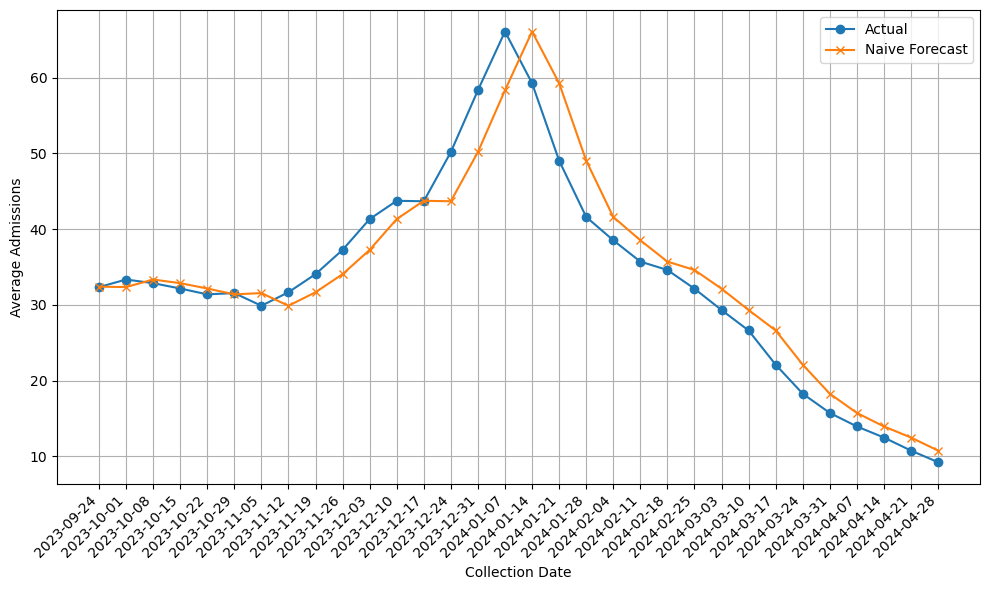

In [100]:
# 6. Visualize Results
import matplotlib.pyplot as plt

# Ensure 'collection_date' is datetime in df_weekly_sorted
if 'collection_date' in df_weekly_sorted.columns:
	if not pd.api.types.is_datetime64_any_dtype(df_weekly_sorted['collection_date']):
		df_weekly_sorted['collection_date'] = pd.to_datetime(df_weekly_sorted['collection_date'])
	date_labels = df_weekly_sorted.loc[test_idx, 'collection_date'].dt.strftime('%Y-%m-%d')
else:
	date_labels = range(len(test_idx))

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(naive_preds, label='Naive Forecast', marker='x')
plt.xlabel('Collection Date')
plt.xticks(ticks=range(len(test_idx)), labels=date_labels, rotation=45, ha='right')
plt.ylabel('Average Admissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Naive Forecast Model: Output Explanation

The naive forecast model predicts each week's COVID-19 admissions as the previous week's actual value, serving as a simple baseline for time series forecasting.

**Key Outputs:**

- **naive_preds**:  
    An array of predicted values for the test set, where each prediction is simply the previous actual value from the series.

- **y_test**:  
    The actual observed values for the test set, used to evaluate the forecast accuracy.

- **Performance Metrics:**  
    - **RMSE (Root Mean Squared Error):** `4.01`  
        Measures the average magnitude of prediction errors. Lower values indicate better performance.
    - **R² (Coefficient of Determination):** `0.91`  
        Indicates that the naive model explains about 91% of the variance in the test data—a strong baseline.
    - **MAE (Mean Absolute Error):**  
        The average absolute difference between predicted and actual values.
    - **MAPE (Mean Absolute Percentage Error):**  
        The average percentage error between predictions and actual values.

**Interpretation:**

- The naive model provides a strong baseline, as shown by the high R² value.
- More complex models (such as LSTM) should outperform this baseline to be considered useful.
- If advanced models do not surpass the naive forecast, further feature engineering or model tuning may be necessary.

**Visualization:**  
A plot of actual vs. naive forecasted values helps visually assess how closely the naive predictions follow the true values.

**Conclusion:**  
The naive forecast is a critical reference point for evaluating the effectiveness of more sophisticated forecasting models.